In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Train Dataset for Intial EDA
df = pd.read_csv("/Users/muskaanmahes/Downloads/placement_train.csv")
print(df)

#type of data each attribute
df.info()




       Student_ID  Age  Gender  Degree Branch  CGPA  Internships  Projects  \
0            1048   22  Female  B.Tech    ECE  6.29            0         3   
1           37820   20  Female     BCA    ECE  6.05            1         4   
2           49668   22    Male     MCA     ME  7.22            1         4   
3           19467   22    Male     MCA     ME  7.78            2         4   
4           23094   20  Female  B.Tech     ME  7.63            1         4   
...           ...  ...     ...     ...    ...   ...          ...       ...   
44995        9362   20    Male     MCA  Civil  7.84            2         5   
44996        8940   19  Female    B.Sc     ME  8.28            1         4   
44997       13097   20  Female    B.Sc  Civil  8.88            0         4   
44998       12958   24  Female     MCA    ECE  5.90            1         3   
44999        9565   23  Female  B.Tech     ME  6.28            0         4   

       Coding_Skills  Communication_Skills  Aptitude_Test_Score

In [27]:
#missing values
#to check for any nulls
rows_with_nulls = df[df.isnull().any(axis=1)]
print("Rows with null values: ")
print(rows_with_nulls)


Rows with null values: 
Empty DataFrame
Columns: [Student_ID, Age, Gender, Degree, Branch, CGPA, Internships, Projects, Coding_Skills, Communication_Skills, Aptitude_Test_Score, Soft_Skills_Rating, Certifications, Backlogs, Placement_Status]
Index: []


In [28]:
#duplicate data
number_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {number_duplicates}")




Number of duplicate rows: 0



Outliers in 'Student_ID': 
Empty DataFrame
Columns: [Student_ID]
Index: []
Total outliers in 'Student_ID': 0

Outliers in 'Age': 
Empty DataFrame
Columns: [Age]
Index: []
Total outliers in 'Age': 0

Outliers in 'CGPA': 
       CGPA
685    9.80
690    9.74
776    9.80
1055   9.80
1329   9.80
...     ...
44145  9.80
44540  9.80
44750  9.80
44795  9.76
44873  9.80

[153 rows x 1 columns]
Total outliers in 'CGPA': 153

Outliers in 'Internships': 
       Internships
42               3
55               3
155              3
162              3
187              3
...            ...
44888            3
44909            3
44952            3
44972            3
44973            3

[1652 rows x 1 columns]
Total outliers in 'Internships': 1652

Outliers in 'Projects': 
       Projects
87            6
88            6
113           1
119           1
134           6
...         ...
44756         6
44777         6
44873         6
44933         6
44947         6

[1130 rows x 1 columns]
Total outliers in 

<function matplotlib.pyplot.show(close=None, block=None)>

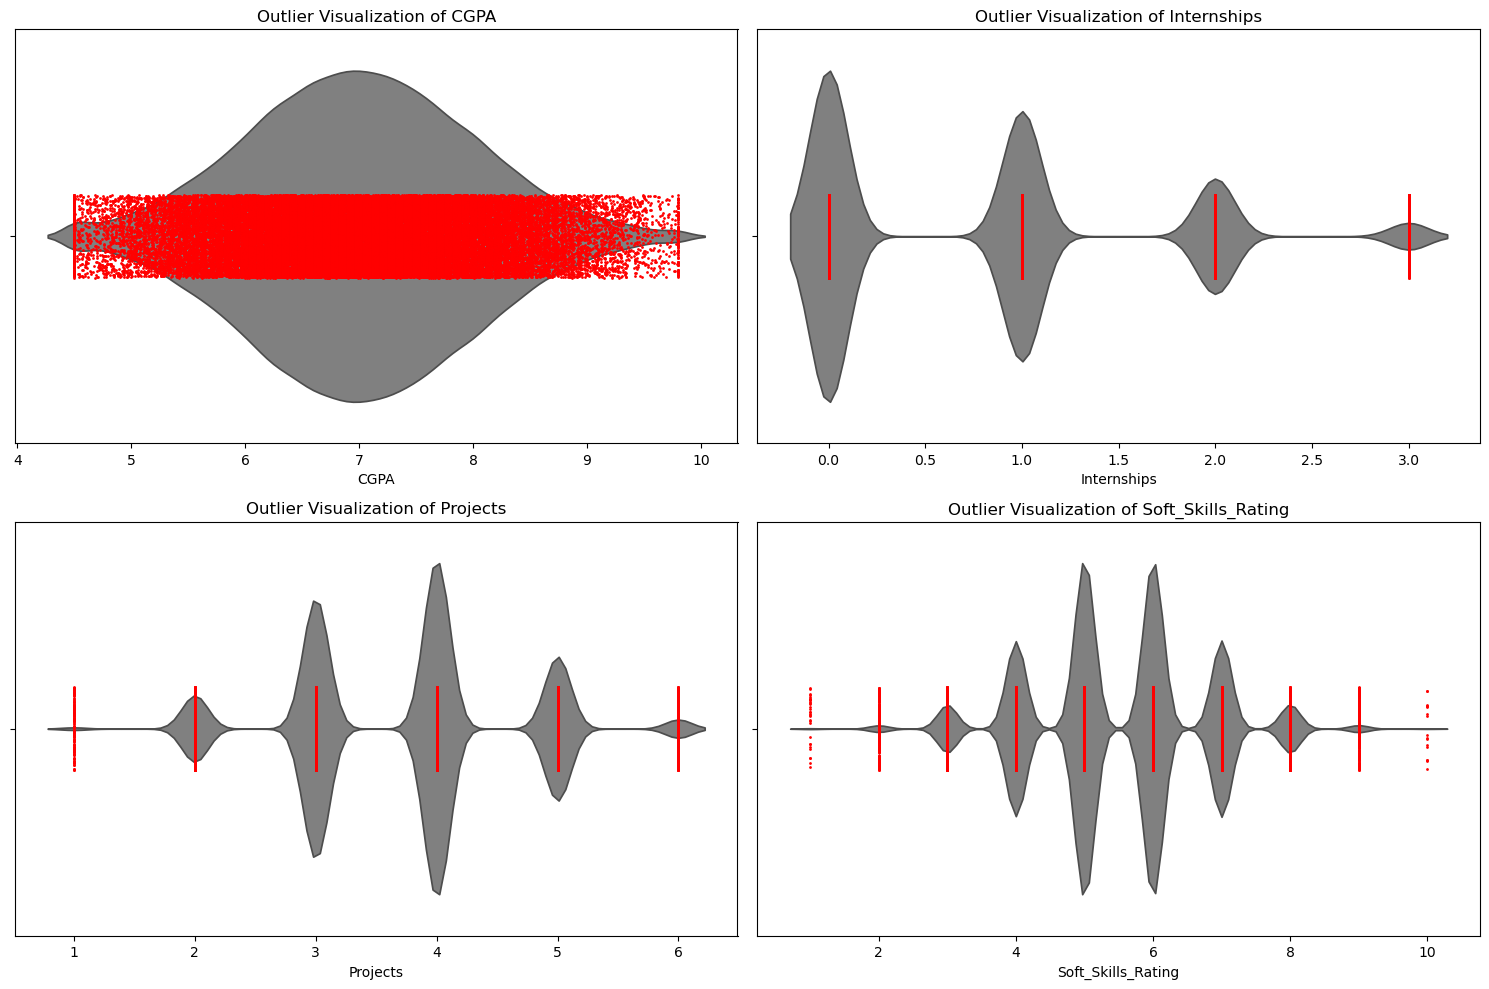

In [29]:
#are there outliers
numeric_column = df.select_dtypes(include = ['float64', 'int64']).columns

for col in numeric_column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nOutliers in '{col}': ")
    print(outlier[[col]])
    print(f"Total outliers in '{col}': {outlier.shape[0]}")



#visualizing outliers
#columns that had outliers
column_outlier = ['CGPA', 'Internships', 'Projects', 'Soft_Skills_Rating']

plt.figure(figsize=(15,10))

#violin and strip plots
for i, col in enumerate(column_outlier, 1):
    plt.subplot(2,2,i)
    sns.violinplot(x=data[col], inner=None, color='gray')
    sns.stripplot(x=data[col], color = 'red', size=2, jitter=True)
    plt.title(f'Outlier Visualization of {col}')

plt.tight_layout()
plt.show